In [45]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = yf.download('SPY','2021-01-01', '2021-12-31', interval='1d')
n = 21

[*********************100%***********************]  1 of 1 completed


In [47]:
df['close_p15_max'] = df['Close'].shift(1).rolling(n).max()
df['close_p15_min'] = df['Close'].shift(1).rolling(n).min()

df['roi_from_high'] = df['Close'] / df['close_p15_max'] - 1
df['roi_from_low'] = df['Close'] / df['close_p15_min'] - 1

df['roi_from_high_10th_pct'] = df['roi_from_high'].rolling(n).quantile(0.10)
df['roi_from_low_90th_pct'] = df['roi_from_low'].rolling(n).quantile(0.90)

df.dropna(inplace=True)
df.reset_index(inplace=True)

In [48]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,close_p15_max,close_p15_min,roi_from_high,roi_from_low,roi_from_high_10th_pct,roi_from_low_90th_pct
205,2021-12-23,468.750000,472.190002,468.640015,470.600006,465.213684,56439700,470.739990,450.5,-0.000297,0.044617,-0.033479,0.044617
206,2021-12-27,472.059998,477.309998,472.010010,477.260010,471.797455,56808600,470.739990,450.5,0.013851,0.059401,-0.033479,0.044617
207,2021-12-28,477.720001,478.809998,476.059998,476.869995,471.411896,47274600,477.260010,450.5,-0.000817,0.058535,-0.033479,0.044928
208,2021-12-29,476.980011,478.559998,475.920013,477.480011,472.014984,54503000,477.260010,450.5,0.000461,0.059889,-0.033479,0.058535
209,2021-12-30,477.929993,479.000000,475.670013,476.160004,470.710083,55329000,477.480011,450.5,-0.002765,0.056959,-0.033479,0.058535


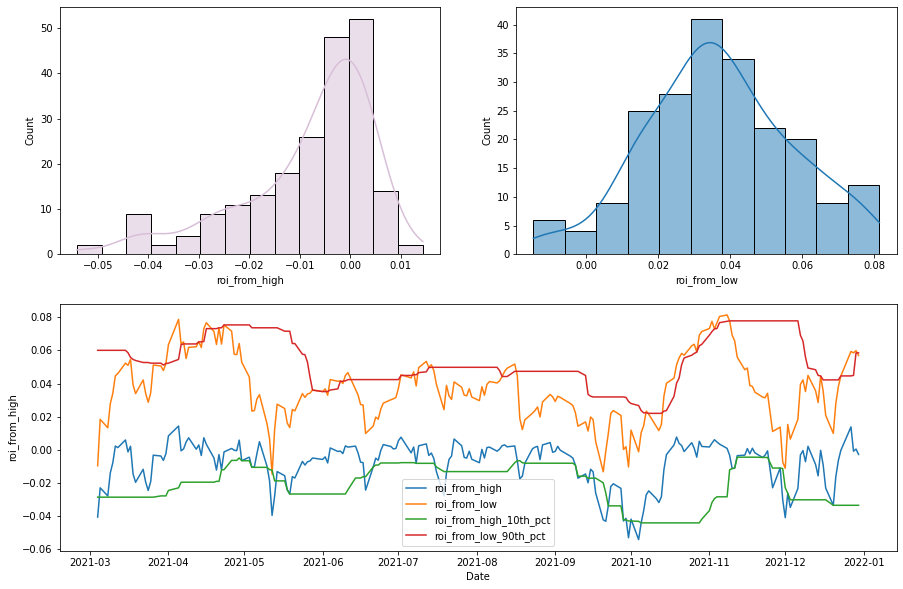

In [49]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(df['roi_from_high'], color= 'thistle', kde=True).set(xlabel='roi_from_high')

plt.subplot(2,2,2)
sns.histplot(df['roi_from_low'], kde=True).set(xlabel='roi_from_low')

plt.subplot(2,1,2)
sns.lineplot(x=df['Date'],y=df['roi_from_high'], label='roi_from_high')
sns.lineplot(x=df['Date'],y=df['roi_from_low'], label='roi_from_low')

sns.lineplot(x=df['Date'],y=df['roi_from_high_10th_pct'], label='roi_from_high_10th_pct')
sns.lineplot(x=df['Date'],y=df['roi_from_low_90th_pct'], label='roi_from_low_90th_pct')

plt.show()

In [50]:
cols = ['Date', 'Close', 'roi_from_high', 'roi_from_low',
       'roi_from_high_10th_pct', 'roi_from_low_90th_pct']
df[cols].head()

,Date,Close,roi_from_high,roi_from_low,roi_from_high_10th_pct,roi_from_low_90th_pct
0,2021-03-04,376.700012,-0.040597,-0.009622,-0.028576,0.06007
1,2021-03-05,383.630005,-0.022947,0.018397,-0.028576,0.06007
2,2021-03-08,381.720001,-0.027812,0.013326,-0.028576,0.06007
3,2021-03-09,387.170013,-0.013931,0.027794,-0.028576,0.06007
4,2021-03-10,389.579987,-0.007793,0.034192,-0.028576,0.06007


In [51]:
import datetime as dt
df_ = pd.read_csv("results.csv")

In [52]:
df_ = df_[df_['Date']>='2021-02-16'].copy()
cols = ['Date', 'Close', 'roi_from_high', 'roi_from_low',
       'roi_from_high_10th_pct', 'roi_from_low_90th_pct']

In [53]:
df[cols].tail()

,Date,Close,roi_from_high,roi_from_low,roi_from_high_10th_pct,roi_from_low_90th_pct
205,2021-12-23,470.600006,-0.000297,0.044617,-0.033479,0.044617
206,2021-12-27,477.260010,0.013851,0.059401,-0.033479,0.044617
207,2021-12-28,476.869995,-0.000817,0.058535,-0.033479,0.044928
208,2021-12-29,477.480011,0.000461,0.059889,-0.033479,0.058535
209,2021-12-30,476.160004,-0.002765,0.056959,-0.033479,0.058535


In [54]:
df_.tail()

,Unnamed: 0,Date,Close,roi_from_high,roi_from_low,roi_from_high_10th_pct,roi_from_low_90th_pct
225,225,2021-12-23,470.600006,-0.000297,0.044617,-0.035310,0.069351
226,226,2021-12-27,477.260010,0.000000,0.059401,-0.035271,0.069343
227,227,2021-12-28,476.869995,-0.000817,0.058535,-0.035232,0.069336
228,228,2021-12-29,477.480011,0.000000,0.059889,-0.035192,0.069329
229,229,2021-12-30,476.160004,-0.002765,0.056959,-0.035153,0.069322


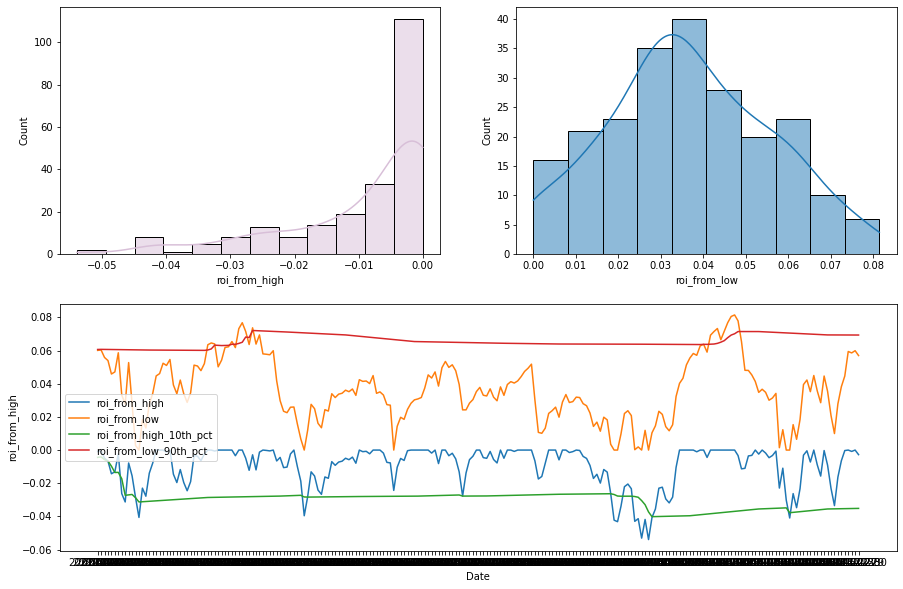

In [55]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(df_['roi_from_high'], color= 'thistle', kde=True).set(xlabel='roi_from_high')

plt.subplot(2,2,2)
sns.histplot(df_['roi_from_low'], kde=True).set(xlabel='roi_from_low')

plt.subplot(2,1,2)
sns.lineplot(x=df_['Date'],y=df_['roi_from_high'], label='roi_from_high')
sns.lineplot(x=df_['Date'],y=df_['roi_from_low'], label='roi_from_low')

sns.lineplot(x=df_['Date'],y=df_['roi_from_high_10th_pct'], label='roi_from_high_10th_pct')
sns.lineplot(x=df_['Date'],y=df_['roi_from_low_90th_pct'], label='roi_from_low_90th_pct')

plt.show()